**PREDICT CREDICT DEFAULTS WITH RANDOM FOREST USING IN PYTHON**

Session Flow: Presenting a Loan Default Prediction Model
1. Introduction

Topic: Loan Default Prediction
Objective: Improve the loan approval process by predicting which applicants are likely to default on their car loans using a Random Forest algorithm.
Context: The company has observed an increase in loan defaults, leading to financial losses. A more accurate prediction model is needed to mitigate these losses.
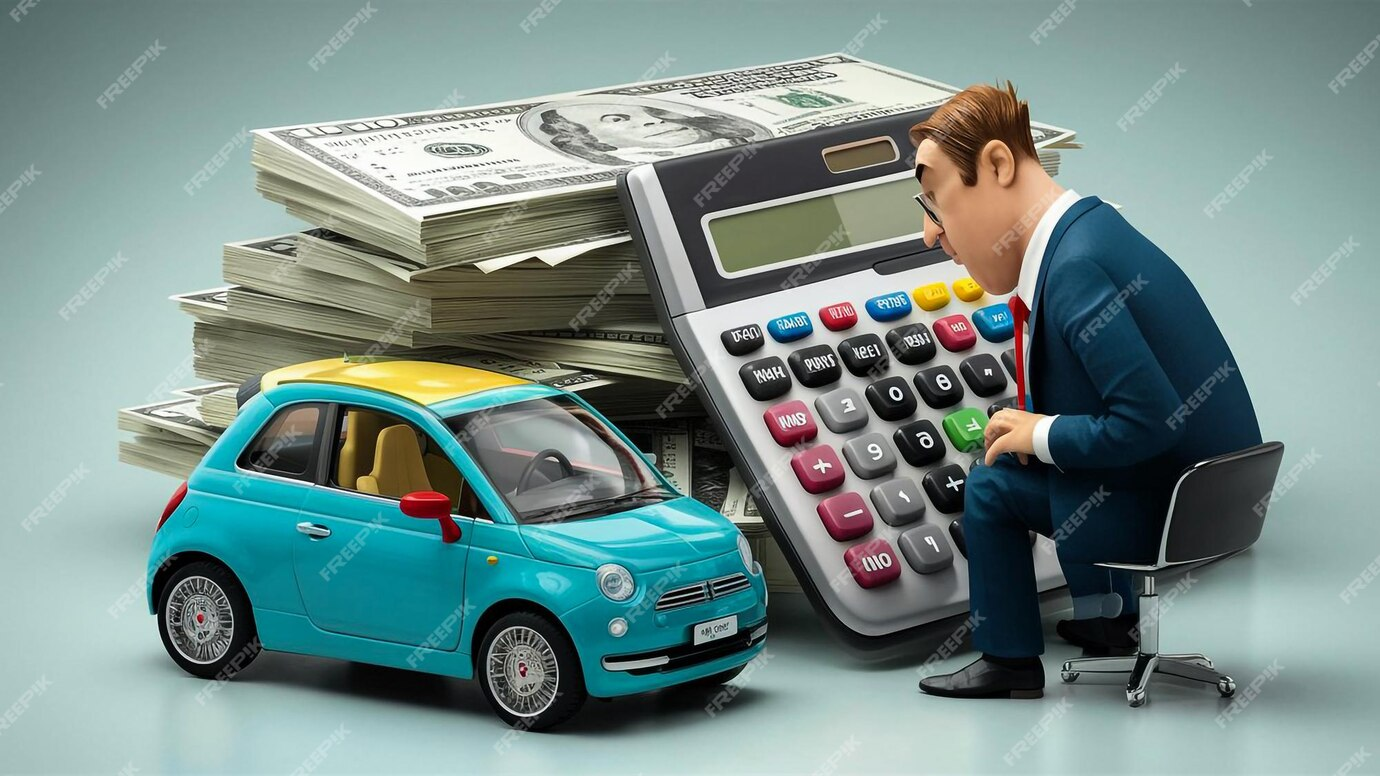
2. Business Problem

Current Challenge: The company provides car loans, but a rising number of borrowers are unable to repay their loans, resulting in defaults. This not only impacts the company's revenue but also its risk management strategies.
Need for a Solution: The goal is to enhance the loan approval process by identifying potential defaulters before the loan is approved, allowing the company to make more informed decisions.

Default: The borrower is likely to default on the loan (i.e., not pay it back).
Non-default: The borrower is likely to repay the loan.

3. Primary Goal

Objective: Develop a machine learning model to classify loan applications into two categories:
Default: The borrower is likely to default on the loan.
Non-default: The borrower is likely to repay the loan.

4. Using a Random Forest Algorithm

Why Random Forest?: Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction accuracy and handle large datasets with higher reliability.
Code Walkthrough:

Data Preparation:

Loading Data: The dataset is loaded, and the irrelevant 'ID' column is removed.
Data Cleaning: The dataset is checked for missing values and invalid data points, particularly in the 'EDUCATION' and 'MARRIAGE' columns. Invalid data is filtered out.
Exploratory Data Analysis (EDA):

Visualizing the Target Variable: A count plot is created to visualize the distribution of defaulted and non-defaulted loans.
Handling Imbalanced Data:

Downsampling: The majority class (non-default) is downsampled to balance the dataset, which is crucial for training the model effectively.
Feature Engineering:

One-Hot Encoding: Categorical variables related to payment history are converted into numerical formats using one-hot encoding, ensuring they can be used effectively in the model.
Model Training and Evaluation:

Splitting Data: The data is split into training and testing sets.
Model Training: A Random Forest classifier is trained on the training data.
Model Evaluation: The model's accuracy is evaluated using a confusion matrix to visualize its performance in classifying loan defaults.
Hyperparameter Tuning:

RandomizedSearchCV: The model's hyperparameters are optimized to enhance performance. The best combination of parameters is identified, and the model is refitted using these settings.
Final Accuracy: The tuned model's accuracy is calculated and compared to the initial model.


In [ ]:
# --------------------------------------------------------------------------1.Install necessary packages------------------------------------------------------------------------------------------
!pip install numpy pandas matplotlib seaborn scikit-learn xlrd


In [ ]:
#----------------------------------------------------------------------------2.importing the libraries--------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ----------------------------------------------------------------------------3.Import the data set---------------------------------------------------------------------------------------
df = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UEym8G6lwphKjuhkLgkXAg/default%20of%20credit%20card%20clients.xls', header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
#This line removes the 'ID' column because it is not informative for our analysis or modeling. The 'ID' column typically serves as a unique identifier for each row but does not contribute to predicting whether a loan will default.

In [ ]:


# Rename the columns
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)
# Remove the ID column as it is not informative
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)

In [ ]:
#--------------------------------------------------------------------------4. Data Exploration and Cleaning----------------------------------------------------------------------------

In [ ]:
print(f"SEX values include: {df['SEX'].unique()}")
print(f"MARRIAGE values include: {df['MARRIAGE'].unique()}")
print(f"EDUCATION values include: {df['EDUCATION'].unique()}")

# Count missing or null values
print(f"Number of missing values in SEX: {len(df[pd.isnull(df.SEX)])}")
print(f"Number of missing values in MARRIAGE: {len(df[pd.isnull(df.MARRIAGE)])}")
print(f"Number of missing values in EDUCATION: {len(df[pd.isnull(df.EDUCATION)])}")
print(f"Number of missing values in AGE: {len(df[pd.isnull(df.AGE)])}")



# Count of invalid data in EDUCATION and MARRIAGE education = 0 unknow ,education = 1 gaduate etc
invalid_count = len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])
print(f"Number of invalid data points in EDUCATION or MARRIAGE: {invalid_count}")

# Filter the DataFrame
df_no_missing_data = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]
print(f"shape of no_missing_data: {df_no_missing_data.shape}")



SEX values include: [2 1]
MARRIAGE values include: [1 2 3 0]
EDUCATION values include: [2 1 3 5 4 6 0]
Number of missing values in SEX: 0
Number of missing values in MARRIAGE: 0
Number of missing values in EDUCATION: 0
Number of missing values in AGE: 0
Number of invalid data points in EDUCATION or MARRIAGE: 68
shape of no_missing_data: (29932, 24)


In [ ]:
df_no_missing_data  #df_no_missing_data is a new DataFrame created from the original DataFrame (df).It contains only the rows where the EDUCATION and MARRIAGE columns have valid (non-zero) values.


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<ipython-input-21-9ded2276e0ca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  obj = sns.countplot(x = df_no_missing_data['DEFAULT'], palette = 'rocket')#Palette in Seaborn: Seaborn, a popular Python visualization library, provides several built-in color palettes to customize the appearance of plots. The palette parameter allows you to choose a color scheme for your plot. it is a obj is a oject of matplotlib and seaborn


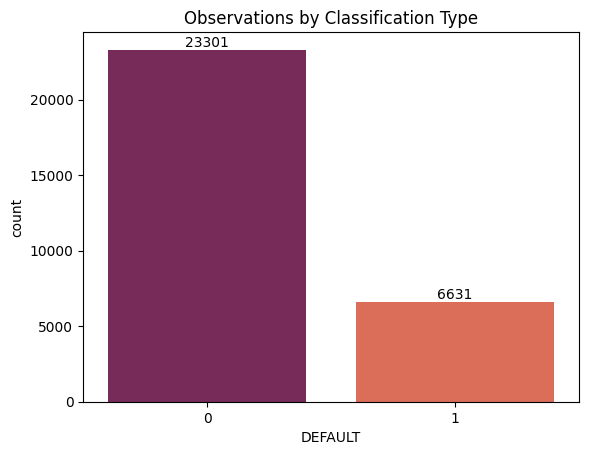

In [ ]:
obj = sns.countplot(x = df_no_missing_data['DEFAULT'], palette = 'rocket')#Palette in Seaborn: Seaborn, a popular Python visualization library, provides several built-in color palettes to customize the appearance of plots. The palette parameter allows you to choose a color scheme for your plot. it is a obj is a oject of matplotlib and seaborn
for container in obj.containers:#Context: ax is an instance of the Axes class from Matplotlib. It represents a single plot or a subplot in a figure.,purpose to adding labels.
    obj.bar_label(container)#Containers: These are groups of related graphical elements created by the plotting function. bar chart, each bar is a graphical element, and containers helps manage and access these elements.
plt.title("Observations by Classification Type")
plt.show()

**Downsampling**


Downsampling: This process reduces the number of samples in a dataset. It’s particularly useful when you have an imbalanced dataset (e.g., more non-defaults than defaults) and you want to balance it.
Function: resample is used to randomly sample 1000 rows from df_no_default without replacement (replace=False means no row will be sampled more than once).
Why 1000 Samples?: The choice of 1000 samples is often to match the number of instances in the minority class (df_default), which helps in creating a balanced dataset.
random_state=0: This ensures reproducibility. The same random samples will be chosen each time you run the code, which is important for consistency in experiments.

In [ ]:
#DEFAULT == 0 are loans that were repaid successfully without default.
#DEFAULT == 1 borrower failed to repay, leading to default.

#--------------------------------------------------------------------------------------------5.Split data-----------------------------------------------------------------------------
df_no_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==0)]
df_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==1)]

# Downsample the data set

from sklearn.utils import resample # to use the resample function


df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=0)
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=0)

# Merge the data sets
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
print(f"Shape of df_downsample: {df_downsample.shape}")



Shape of df_downsample: (2000, 24)


1: Payment made delay: 0:
No delay : 1
Payment delayed by 1 month.
Payment delayed by 2 months.
so this are all categorical varaibles so we need to convert it to  by onehot encoding


In [ ]:
# split of x and y here we isolate x
X = df_downsample.drop(['DEFAULT','SEX', 'EDUCATION', 'MARRIAGE','AGE'], axis=1).copy()#copy()DataFrame object is created with the same data, and modifications to this new DataFrame do not affect the original DataFrame. Here’s why it’s used in this context:
print(f"Shape of X: {X.shape}")

# One-hot encoding
X_encoded = pd.get_dummies(data=X, columns=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
print(f"Shape of X_encoded: {X_encoded.shape}")
X_encoded.head()


Shape of X: (2000, 19)
Shape of X_encoded: (2000, 70)


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
2320,50000,390,918,19583,19593,19364,19893,918,19583,1000,...,False,False,False,True,False,False,False,False,False,False
2887,500000,24170,8051,77908,50297,43679,49749,8091,78192,65,...,False,False,False,True,False,False,False,False,False,False
9916,220000,4289,4637,1252,8069,18117,23176,1031,3077,7500,...,False,False,False,True,False,False,False,False,False,False
24070,80000,77901,79605,79207,0,0,0,3600,2407,0,...,False,True,False,False,False,False,False,False,False,False
16550,220000,38074,43083,47051,65321,83882,72812,6000,5000,20012,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
y = df_downsample['DEFAULT'].copy()


In [ ]:
 #--------------------------------------------------------------------------------6.spliting of traing and testing data---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)



Splitting Data: The data is split into training and testing sets.
Model Training: A Random Forest classifier is trained on the training data.
Model Evaluation: The model's accuracy is evaluated using a confusion matrix to visualize its performance in classifying loan defaults.
Hyperparameter Tuning:

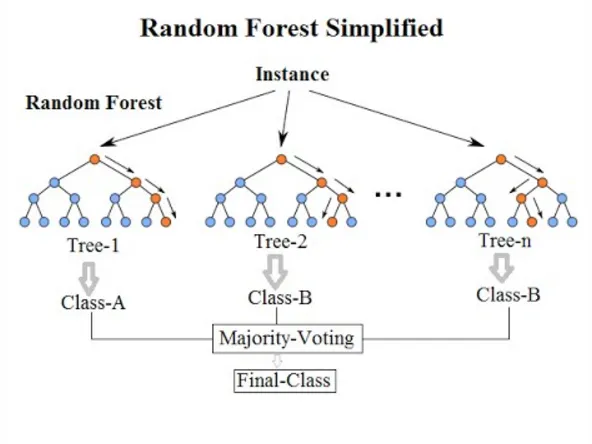

RandomForestClassifier
The RandomForestClassifier is a machine learning model that belongs to the ensemble learning Ensemble Learning: This technique combines predictions from multiple models to improve the overall performance. The idea is that a group of "weak learners" can come together to form a "strong learner."

In [ ]:
#----------------------------------------------------------------------------------7.training the model---------------------------------------------------------------------------------------
#Classify accounts and evaluate the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV# RandomizedSearchCV improve performance  hyperparameter tuning. Hyperparameters are settings that need to be set before training the model (e.g., max_depth, number of trees, etc.). Finding the best combination of these hyperparameters can improve model performance.
obj = RandomForestClassifier(max_depth=2, random_state=0)
obj.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:

# Calculate overall accuracy
y_pred = obj.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6325

In [ ]:
#Human-Readable Labels: When you create class_names = ['Did Not Default', 'Defaulted'], you're not changing the underlying data type of the DEFAULT variable. The data remains as numerical values (0 and 1). The class_names are simply used for better visualization and interpretation.
class_names = ['Did Not Default', 'Defaulted']  #0 as Did Not Default' and 1 as Defaulted
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Confusion Matrix? evaluate the performance of a classification model. It allows you to see how many predictions were correct and how many were incorrect for each class. It's especially useful for binary classification problems, where you have two classes (e.g., "Defaulted" and "Did Not Default").
# Calculate the percentage of correctly predicted instances for each class
for i, class_name in enumerate(class_names): #The enumerate() function in Python adds a counter to an iterable (like a list) and returns it as an enumerate object.
    correct_predictions = cm[i, i]
    total_predictions = cm[i, :].sum()
    class_accuracy = correct_predictions / total_predictions * 100
    print(f'Percentage of correctly predicted {class_name}: {class_accuracy:.2f}%')



Percentage of correctly predicted Did Not Default: 69.00%
Percentage of correctly predicted Defaulted: 57.50%


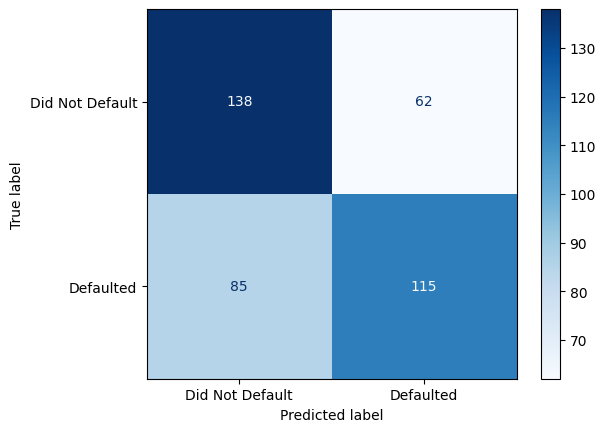

In [ ]:
# Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)#In Matplotlib, cmap stands for color map. It is a parameter used in various plotting functions to define the color scheme
plt.show()

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found: {'min_samples_split': 3, 'min_samples_leaf': 4, 'max_depth': 5}
Best estimator is: RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=3,
                       random_state=0)
Accuracy: 64.75%


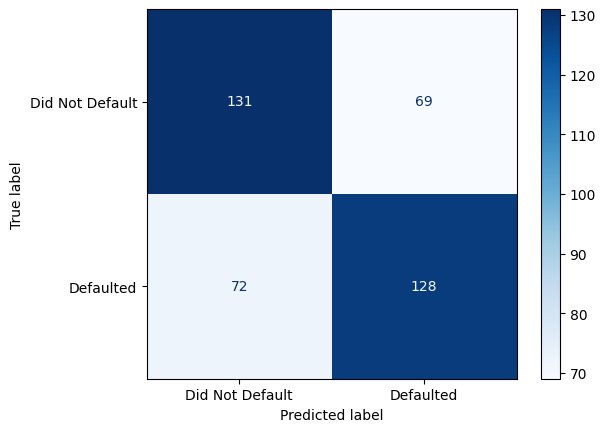

In [ ]:
#Hyperparameter tuning===Improve Model Performance,Avoid Overfitting/Underfitting:
param_grid = {
    'max_depth':[3,4,5],
    'min_samples_split':[3,4,5],
    'min_samples_leaf':[3,4,5],
}

rf_random = RandomizedSearchCV(
    estimator=obj,
    param_distributions=param_grid,
    n_iter=27,
    cv=3,
    random_state=0,
    verbose=1,
    n_jobs = -1,
)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Output the best hyperparameters found
best_params = rf_random.best_params_
print(f'Best parameters found: {best_params}')
print(f'Best estimator is: {rf_random.best_estimator_}')

# Refit the model using the best hyperparameters
best_clf_rf = rf_random.best_estimator_

# In case you want to check all parameters currently in use
# print(f'Parameters currently in use: {best_clf_rf.get_params()}')

# Train the refitted model
best_clf_rf.fit(X_train, y_train)

# Calculate overall accuracy
y_pred = best_clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# Plot the confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
    best_clf_rf,
    X_test,
    y_test,
    display_labels=class_names,
    cmap=plt.cm.Blues,
)
plt.show()

**Summary and Conclusion**

Key Findings: The Random Forest model, after hyperparameter tuning, provided a more accurate classification of loan defaults, helping the company to better predict which loan applications might lead to default. Impact: By implementing this model, the company can reduce financial losses and improve the decision-making process during loan approvals. Next Steps: Further refinement of the model can include testing with different datasets, additional feature engineering, and incorporating more advanced techniques like ensemble learning or deep learning for even better performance.                     